# Data Loading and Splitting

## Setup

In [1]:
!pip install torchmetrics attrdict -q

In [2]:
%%capture
# Install libraries
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torchmetrics

## Download the dataset

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/Chimamuelo/Coding-Nomads-Deep-Learning-1/master/Data/train.csv')
df_test=pd.read_csv('https://raw.githubusercontent.com/Chimamuelo/Coding-Nomads-Deep-Learning-1/master/Data/test.csv')

## Split your data

In [4]:
train=df.loc[:,df.columns!='Survived']
valid=df['Survived']

# EDA & data visualization

In [5]:
print(train.shape)
print(valid.shape)

(891, 11)
(891,)


In [6]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
valid

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [8]:
for column in train.columns:
  data_type=train[column].dtypes
  print(column,data_type)

PassengerId int64
Pclass int64
Name object
Sex object
Age float64
SibSp int64
Parch int64
Ticket object
Fare float64
Cabin object
Embarked object


In [9]:
train.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

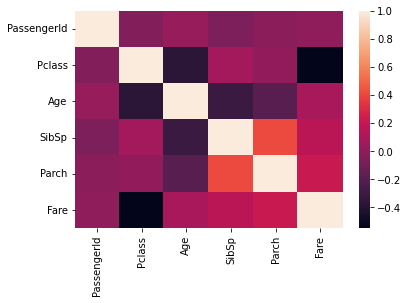

In [11]:
sns.heatmap(train.corr());

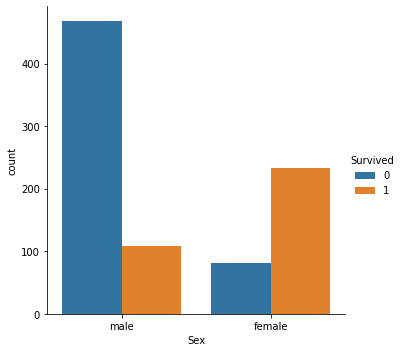

In [12]:
sns.catplot(x='Sex',hue='Survived',data=df,kind='count')

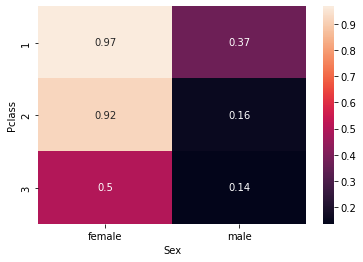

In [13]:
heatmap1_data = pd.pivot_table(df, values='Survived', 
                     index=['Pclass'], 
                     columns='Sex')
sns.heatmap(heatmap1_data,annot=True)

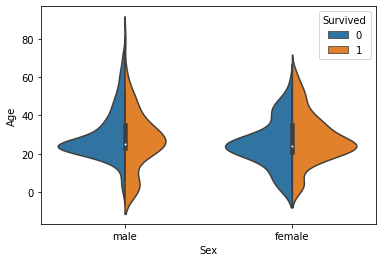

In [14]:
sns.violinplot(x='Sex',y='Age',hue='Survived',data=df,split=True)

# Feature engineering and transformation

In [15]:
from sklearn.preprocessing import OrdinalEncoder,MinMaxScaler

In [16]:
oe=OrdinalEncoder(categories='auto')
df['Pclass']=oe.fit_transform(df[['Pclass']])

In [17]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,2.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,2.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,2.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1.0,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,0.0,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,2.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,0.0,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [18]:
df=pd.concat([df,pd.get_dummies(df['Sex'],prefix='Sex')],axis=1)
df.drop(['Sex'],axis=1,inplace=True)

In [19]:
df=pd.concat([df,pd.get_dummies(df['Embarked'],prefix='Embarked')],axis=1)
df.drop(['Embarked'],axis=1,inplace=True)

In [20]:
df.drop('Name',axis=1,inplace=True)

In [21]:
df.drop('Ticket',axis=1,inplace=True)

In [22]:
df.drop('Cabin',axis=1,inplace=True)

In [23]:
df.drop(['PassengerId'],axis=1,inplace=True)

In [24]:
df['Family'] = 0
df['Family'] = df['Parch']+df['SibSp']

df['Alone'] = 0
df.loc[df.Family == 0, 'Alone'] = 1

df.drop(['Parch','SibSp'],axis=1,inplace=True)

# Traditional ML modeling

In [25]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [26]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.9)

In [28]:
X_test

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family,Alone
168,0.0,24.0,25.9250,0,1,0,0,1,0,1
588,2.0,22.0,8.0500,0,1,0,0,1,0,1
21,1.0,34.0,13.0000,0,1,0,0,1,0,1
691,2.0,4.0,13.4167,1,0,1,0,0,1,0
230,0.0,35.0,83.4750,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
192,2.0,19.0,7.8542,1,0,0,0,1,1,0
57,2.0,28.5,7.2292,0,1,1,0,0,0,1
381,2.0,1.0,15.7417,1,0,1,0,0,2,0
886,1.0,27.0,13.0000,0,1,0,0,1,0,1


In [29]:
y_test

168    0
588    0
21     1
691    1
230    1
      ..
192    1
57     0
381    1
886    0
142    1
Name: Survived, Length: 90, dtype: int64

In [30]:
y_train

48     0
823    1
870    0
736    0
515    0
      ..
827    1
12     0
391    1
418    0
589    0
Name: Survived, Length: 801, dtype: int64

In [31]:
X_train

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family,Alone
48,2.0,24.0,21.6792,0,1,1,0,0,2,0
823,2.0,27.0,12.4750,1,0,0,0,1,1,0
870,2.0,26.0,7.8958,0,1,0,0,1,0,1
736,2.0,48.0,34.3750,1,0,0,0,1,4,0
515,0.0,47.0,34.0208,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
827,1.0,1.0,37.0042,0,1,1,0,0,2,0
12,2.0,20.0,8.0500,0,1,0,0,1,0,1
391,2.0,21.0,7.7958,0,1,0,0,1,0,1
418,1.0,30.0,13.0000,0,1,0,0,1,0,1


In [32]:
model=RandomForestClassifier()
param_grid = {
                 'n_estimators': [5, 10, 15, 20,30],
                 'max_depth': [2, 5, 7, 9,11,15,20]
             }

In [33]:
grid_clf = GridSearchCV(model, param_grid, cv=10)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 9, 11, 15, 20],
                         'n_estimators': [5, 10, 15, 20, 30]})

In [34]:
mod=xgb.XGBClassifier()
mod.fit(X_train,y_train)

XGBClassifier()

In [35]:
grid_clf.best_params_

{'max_depth': 7, 'n_estimators': 20}

In [36]:
final_model=grid_clf.best_estimator_

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, fbeta_score

In [38]:
pred=final_model.predict(X_test)
predict=mod.predict(X_test)

In [39]:
precision = precision_score(y_test,pred)
prec=precision_score(y_test,predict)
print(precision,prec)

0.7692307692307693 0.8


In [40]:
## recall
recall=recall_score(y_test,pred)
rec=recall_score(y_test,predict)
print(recall,rec)

0.7142857142857143 0.7142857142857143


In [41]:
score=f1_score(y_test,pred)
score_g=f1_score(y_test,predict)
print(score,score_g)


0.7407407407407408 0.7547169811320756


In [42]:
con_matrix=confusion_matrix(y_test,pred)
con_matrix

array([[56,  6],
       [ 8, 20]])

[]

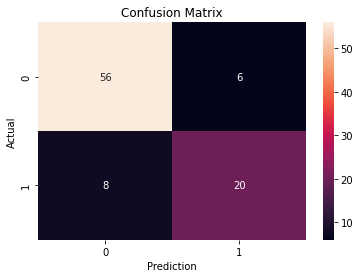

In [43]:
ax=sns.heatmap(con_matrix,annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.plot()

In [44]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [45]:
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mode()[0])
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

In [46]:
oe=OrdinalEncoder(categories='auto')
df_test['Pclass']=oe.fit_transform(df_test[['Pclass']])

In [47]:
df_test=pd.concat([df_test,pd.get_dummies(df_test['Sex'],prefix='Sex')],axis=1)
df_test.drop(['Sex'],axis=1,inplace=True)

In [48]:
df_test=pd.concat([df_test,pd.get_dummies(df_test['Embarked'],prefix='Embarked')],axis=1)
df_test.drop(['Embarked'],axis=1,inplace=True)

In [49]:
df_test.drop('Name',axis=1,inplace=True)

In [50]:
df_test.drop('Ticket',axis=1,inplace=True)

In [51]:
df_test.drop('Cabin',axis=1,inplace=True)

In [52]:
idx=df_test['PassengerId']
df_test.drop('PassengerId',axis=1,inplace=True)

In [53]:
df_test['Family'] = 0
df_test['Family'] = df_test['Parch']+df_test['SibSp']

df_test['Alone'] = 0
df_test.loc[df_test.Family == 0, 'Alone'] = 1

df_test.drop(['Parch','SibSp'],axis=1,inplace=True)

In [54]:
prediction=final_model.predict(df_test)
predictions=mod.predict(df_test)

In [55]:
out=prediction.round().astype(int)
outs=predictions.round().astype(int)

In [56]:
type(out)

numpy.ndarray

In [57]:
final=pd.concat([idx,pd.DataFrame(data=out,columns=['Survived'])],axis=1)
finals=pd.concat([idx,pd.DataFrame(data=outs,columns=['Survived'])],axis=1)

In [58]:
final

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [59]:
final.to_csv('no_deep.csv',index=False)

In [60]:
finals.to_csv('xgb.csv',index=False)

# Pure `torch` model

In [61]:
import torch
from torch import nn
import torch.nn.functional as F


from torch.utils.data import Dataset, DataLoader

In [62]:
#Create Dataset
class Titanic(Dataset):
  def __init__(self,x,y):
    super().__init__()

    #X,y as train and label ds
    self.X=torch.tensor(x.to_numpy(),dtype=torch.float32)
    self.y=torch.tensor(y.to_numpy(),dtype=torch.float32)

  def __len__(self):
    return len(self.X)
  
  
  def __getitem__(self,idx):
    return self.X[idx],self.y[idx]




In [63]:
train_ds=Titanic(X_train,y_train)
valid_ds=Titanic(X_test,y_test)

In [64]:
X.describe

<bound method NDFrame.describe of      Pclass   Age     Fare  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
0       2.0  22.0   7.2500           0         1           0           0   
1       0.0  38.0  71.2833           1         0           1           0   
2       2.0  26.0   7.9250           1         0           0           0   
3       0.0  35.0  53.1000           1         0           0           0   
4       2.0  35.0   8.0500           0         1           0           0   
..      ...   ...      ...         ...       ...         ...         ...   
886     1.0  27.0  13.0000           0         1           0           0   
887     0.0  19.0  30.0000           1         0           0           0   
888     2.0  24.0  23.4500           1         0           0           0   
889     0.0  26.0  30.0000           0         1           1           0   
890     2.0  32.0   7.7500           0         1           0           1   

     Embarked_S  Family  Alone  
0             1     

In [65]:
train_ds[2]

(tensor([ 2.0000, 26.0000,  7.8958,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,
          0.0000,  1.0000]), tensor(0.))

In [66]:
valid_ds[2]

(tensor([ 1., 34., 13.,  0.,  1.,  0.,  0.,  1.,  0.,  1.]), tensor(1.))

In [67]:
# Create Dataloader
train_dl =DataLoader(train_ds,
                     batch_size=128,
                     shuffle=True,
                     )
valid_dl =DataLoader(valid_ds,
                     batch_size=128,
                     
                     )

In [68]:
train_iter=iter(train_dl)
input,label=train_iter.next()
print(input.shape[1])

10


In [69]:
#build model
def model(input_features,output_features,n_label):
  
  
  model=nn.Sequential(
      nn.Linear(input_features,output_features),
      nn.ReLU(),
      nn.BatchNorm1d(output_features),
      nn.Dropout(.2),
      nn.Linear(int(output_features),int(output_features)),
      nn.ReLU(),
      nn.BatchNorm1d(int(output_features)),
      nn.Dropout(.2),
      nn.Linear(int(output_features),n_label)
                      )
  return model


In [70]:
model=model(10,256,2)

In [71]:
device = torch.device("cuda")
try:
  model.to(device)
except:
  print('Model device: ', next(model.parameters()).device)

In [72]:
len(model)

9

In [73]:
for x_b, y_b in train_dl:
    break
model(x_b.to(device)).shape



torch.Size([128, 2])

In [74]:
loss_func = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(),lr=.001)
metric = torchmetrics.F1Score()

In [75]:
def train_step(x_b, y_b):

    x_b = x_b.to(device)
    y_b = y_b.to(device)
  
    yhat = model(x_b)
    
 
    loss = loss_func(yhat,y_b)
 
    loss.backward()

    opt.step()
    opt.zero_grad()


    batch_acc = metric(yhat.cpu(), y_b.cpu())


    return loss

In [76]:
def validation_step(x_b, y_b):
    
    x_b = x_b.to(device)
    y_b = y_b.to(device)
    
    with torch.no_grad():
        
        yhat =model(x_b)
       
        loss =loss_func(yhat,y_b)


    batch_acc = metric(yhat.cpu(), y_b.cpu())

   
    return loss

In [77]:
N_EPOCHS = 30

In [78]:
train_losses_step = []
train_losses = []
valid_losses = []
for epoch in range(N_EPOCHS):
   
  model.train() 
  train_loss_epoch = 0.
  for x_b, y_b in train_dl:
    
    y_b=y_b.type(torch.LongTensor)
 
    

    if torch.cuda.is_available():
      x_b, y_b = x_b.cuda(), y_b.cuda()

    opt.zero_grad()
        # Forward Pass
    target = model(x_b)
        # Find the Loss
    loss = loss_func(target,y_b)
        # Calculate gradients
    loss.backward()
        # Update Weights
    opt.step()

    batch_acc = metric(target.cpu(), y_b.cpu())
    train_loss_epoch += loss
    train_losses_step.append(loss.item())

  train_loss_epoch /= len(train_dl)
  train_losses.append(train_loss_epoch.item())
  train_acc = metric.compute()
    
    
  model.eval() 
  val_loss_epoch = 0.
  for x_b, y_b in valid_dl:
    y_b=y_b.type(torch.LongTensor)
       
        # Transfer Data to GPU if available
    if torch.cuda.is_available():
        x_b, y_b = x_b.cuda(), y_b.cuda()
         
        # Forward Pass
    target = model(x_b)
        # Find the Loss
    loss = loss_func(target,y_b)
        # Calculate Loss
    batch_acc = metric(target.cpu(), y_b.cpu())
        
  
    val_loss_epoch += loss
    
  val_loss_epoch /= len(valid_dl)
  valid_acc = metric.compute()
  valid_losses.append(val_loss_epoch.item())

  print(f"Epoch: {epoch}, Train loss: {train_loss_epoch:.04f} Train acc: {float(train_acc):.04f}, Valid loss: {val_loss_epoch} Valid Acc: {float(valid_acc):.04f}")

Epoch: 0, Train loss: 0.7666 Train acc: 0.6167, Valid loss: 0.6026201248168945 Valid Acc: 0.6263
Epoch: 1, Train loss: 0.6451 Train acc: 0.6460, Valid loss: 0.6022244095802307 Valid Acc: 0.6515
Epoch: 2, Train loss: 0.5672 Train acc: 0.6760, Valid loss: 0.5394683480262756 Valid Acc: 0.6794
Epoch: 3, Train loss: 0.5617 Train acc: 0.6900, Valid loss: 0.5190078020095825 Valid Acc: 0.6947
Epoch: 4, Train loss: 0.5580 Train acc: 0.7056, Valid loss: 0.46634289622306824 Valid Acc: 0.7091
Epoch: 5, Train loss: 0.5144 Train acc: 0.7169, Valid loss: 0.4519290030002594 Valid Acc: 0.7192
Epoch: 6, Train loss: 0.5156 Train acc: 0.7246, Valid loss: 0.41558027267456055 Valid Acc: 0.7266
Epoch: 7, Train loss: 0.5006 Train acc: 0.7316, Valid loss: 0.3867068290710449 Valid Acc: 0.7333
Epoch: 8, Train loss: 0.4932 Train acc: 0.7383, Valid loss: 0.37379592657089233 Valid Acc: 0.7399
Epoch: 9, Train loss: 0.4922 Train acc: 0.7433, Valid loss: 0.3865176737308502 Valid Acc: 0.7444
Epoch: 10, Train loss: 0.48

In [79]:
input_tensor=torch.tensor(df_test.values,dtype=torch.float32)
input_tensor=input_tensor.to(device)
final=model(input_tensor)

In [80]:

pred = torch.argmax(final, dim=1)
pred_numpy=pred.cpu().detach().numpy()

In [81]:
type(pred_numpy)

numpy.ndarray

In [82]:
df_test=pd.read_csv('https://raw.githubusercontent.com/Chimamuelo/Coding-Nomads-Deep-Learning-1/master/Data/test.csv')
idx=df_test['PassengerId']

In [83]:
final=pd.concat([idx,pd.DataFrame(data=pred_numpy,columns=['Survived'])],axis=1)
#final=final['Survived'].astype(int)

In [84]:
final

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [85]:
final.to_csv('deep.csv',index=False)

Text(0.5, 0, 'Epoch')

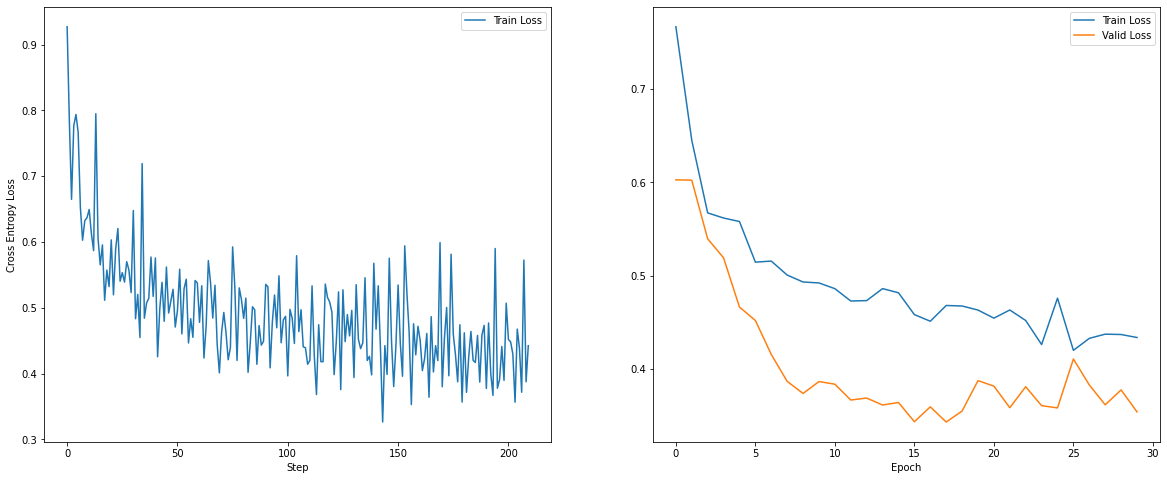

In [86]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20,8))
ax1, ax2 = axes
ax1.plot(train_losses_step, label='Train Loss')
ax2.plot(train_losses, label='Train Loss')
ax2.plot(valid_losses, label='Valid Loss')
ax1.legend()
ax2.legend()
ax1.set_xlabel('Step')
ax1.set_ylabel('Cross Entropy Loss')
ax2.set_xlabel('Epoch')

# High-level libraries and tabular frameworks

# Model selection and test set evaluation

In [87]:
# Your code here

# Notes and findings

What did you learn?